In [355]:
import pyDOE2 
import numpy as np
import pandas as pd

import pandas
import researchpy as rp
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

In [39]:
replicate1 = [90,74,81,83,77,81,88,73,98,72,87,85,99,79,87,80]
replicate2 = [93,78,85,80,78,80,82,70,95,76,83,86,90,75,84,80]
data = pd.DataFrame(ff2n(4), columns = ['a','b','c','d'])
data['r1'] = replicate1
data['r2'] = replicate2
data['sum'] = data['r1'] + data['r2']

In [361]:
data

,a,b,c,d,r1,r2,sum
0,-1.0,-1.0,-1.0,-1.0,90,93,183
1,1.0,-1.0,-1.0,-1.0,74,78,152
2,-1.0,1.0,-1.0,-1.0,81,85,166
3,1.0,1.0,-1.0,-1.0,83,80,163
4,-1.0,-1.0,1.0,-1.0,77,78,155
5,1.0,-1.0,1.0,-1.0,81,80,161
6,-1.0,1.0,1.0,-1.0,88,82,170
7,1.0,1.0,1.0,-1.0,73,70,143
8,-1.0,-1.0,-1.0,1.0,98,95,193
9,1.0,-1.0,-1.0,1.0,72,76,148


In [366]:
avg = sum(data['sum'])/32
total = 0
for i in range(len(data)):
    total += (avg-data['r1'][i])**2
    total += (avg-data['r2'][i])**2


In [368]:
total-af-bf-cf-df-abf-acf-bcf-adf-bdf-cdf-abcf-abdf-acdf-bcdf-abcdf

122.5

In [379]:
avg

82.78125

In [320]:
# Factor Effects
# effect estimate = contrast/(2^(k-1)*n); k = 4, n = 2 -> 2^(k-1)*n = 16
ae = (sum(data.loc[a]['sum']) - sum(data.loc[~a]['sum']))/16
be = (sum(data.loc[b]['sum']) - sum(data.loc[~b]['sum']))/16
ce = (sum(data.loc[c]['sum']) - sum(data.loc[~c]['sum']))/16
de = (sum(data.loc[d]['sum']) - sum(data.loc[~d]['sum']))/16
abe = (sum(data.loc[ab]['sum']) - sum(data.loc[[not x for x in ab]]['sum']))/16
ace = (sum(data.loc[ac]['sum']) - sum(data.loc[[not x for x in ac]]['sum']))/16
bce = (sum(data.loc[bc]['sum']) - sum(data.loc[[not x for x in bc]]['sum']))/16
ade = (sum(data.loc[ad]['sum']) - sum(data.loc[[not x for x in ad]]['sum']))/16
bde = (sum(data.loc[bd]['sum']) - sum(data.loc[[not x for x in bd]]['sum']))/16
cde = (sum(data.loc[cd]['sum']) - sum(data.loc[[not x for x in cd]]['sum']))/16
abce = (sum(data.loc[abc]['sum']) - sum(data.loc[[not x for x in abc]]['sum']))/16
abde = (sum(data.loc[abd]['sum']) - sum(data.loc[[not x for x in abd]]['sum']))/16
acde = (sum(data.loc[acd]['sum']) - sum(data.loc[[not x for x in acd]]['sum']))/16
bcde = (sum(data.loc[bcd]['sum']) - sum(data.loc[[not x for x in bcd]]['sum']))/16
abcde = (sum(data.loc[abcd]['sum']) - sum(data.loc[[not x for x in abcd]]['sum']))/16

In [322]:
af = ((ae*16)**2)/32
bf = ((be*16)**2)/32
cf = ((ce*16)**2)/32
df = ((de*16)**2)/32
abf = ((abe*16)**2)/32
acf = ((ace*16)**2)/32
bcf = ((bce*16)**2)/32
adf = ((ade*16)**2)/32
bdf = ((bde*16)**2)/32
cdf = ((cde*16)**2)/32
abcf = ((abce*16)**2)/32
abdf = ((abde*16)**2)/32
acdf = ((acde*16)**2)/32
bcdf = ((bcde*16)**2)/32
abcdf = ((abcde*16)**2)/32

In [381]:
((sum(data.loc[a]['sum']) + sum(data.loc[~a]['sum']))/2)/((sum(data.loc[a]['sum']) - sum(data.loc[~a]['sum']))/2)

1324.5

In [384]:
ae

-9.0625

In [378]:
print("Source\t  SS\t\tDF\t\tMS\t\t\tF\t\t\tP")
print('a\t', af,'\t',1,'\t',af/3,'\t',af/3/30.625)
print('b\t', bf,'\t',1,'\t',bf/3,'\t\t',bf/3/30.625,)
print('c\t', cf,'\t',1,'\t',cf/3,'\t',cf/3/30.625,)
print('d\t', df,'\t',1,'\t',df/3,'\t\t',df/3/30.625,)
print('ab\t', abf,'\t',1,'\t',abf/3,'\t',abf/3/30.625,)
print('ac\t', acf,'\t',1,'\t',acf/3,'\t',acf/3/30.625,)
print('bc\t', bcf,'\t',1,'\t',bcf/3,'\t\t',bcf/3/30.625,)
print('ad\t', adf,'\t',1,'\t',adf/3,'\t',adf/3/30.625,)
print('bd\t', bdf,'\t',1,'\t',bdf/3,'\t\t',bdf/3/30.625,)
print('cd\t', cdf,'\t',1,'\t',cdf/3,'\t\t',cdf/3/30.625,)
print('abc\t', abcf,'\t',1,'\t',abcf/3,'\t',abcf/3/30.625,)
print('abd\t', abdf,'\t',1,'\t',abdf/3,'\t\t',abdf/3/30.625,)
print('acd\t', acdf,'\t',1,'\t',acdf/3,'\t\t',acdf/3/30.625,)
print('bcd\t', bcdf,'\t',1,'\t',bcdf/3,'\t\t',bcdf/3/30.625,)
print('abcd\t', abcdf,'\t',1,'\t',abcdf/3,'\t\t',abcdf/3/30.625,)
print('error\t',122.5,'\t\t',24,'\t',112.5/28)
print('total\t',total,'\t',31,'\t')


Source	  SS		DF		MS			F			P
a	 657.03125 	 1 	 219.01041666666666 	 7.151360544217686
b	 13.78125 	 1 	 4.59375 		 0.15
c	 57.78125 	 1 	 19.260416666666668 	 0.6289115646258504
d	 124.03125 	 1 	 41.34375 		 1.35
ab	 132.03125 	 1 	 44.010416666666664 	 1.4370748299319727
ac	 3.78125 	 1 	 1.2604166666666667 	 0.04115646258503402
bc	 2.53125 	 1 	 0.84375 		 0.027551020408163266
ad	 38.28125 	 1 	 12.760416666666666 	 0.41666666666666663
bd	 0.28125 	 1 	 0.09375 		 0.003061224489795918
cd	 22.78125 	 1 	 7.59375 		 0.2479591836734694
abc	 215.28125 	 1 	 71.76041666666667 	 2.343197278911565
abd	 175.78125 	 1 	 58.59375 		 1.913265306122449
acd	 7.03125 	 1 	 2.34375 		 0.07653061224489796
bcd	 7.03125 	 1 	 2.34375 		 0.07653061224489796
abcd	 47.53125 	 1 	 15.84375 		 0.5173469387755102
error	 122.5 		 24 	 4.017857142857143
total	 1627.46875 	 31 	


In [342]:
print('Factor effects')
print('a =', ae)
print('b =', be)
print('c =', ce)
print('d =', de)
print('ab =', abe)
print('ac =', ace)
print('bc =', bce)
print('ad =', ade)
print('bd =', bde)
print('cd =', cde)
print('abc =', abce)
print('abd =', abde)
print('acd =', acde)
print('bcd =', bcde)
print('abcd =', abcde)

Factor effects
a = -9.0625
b = -1.3125
c = -2.6875
d = 3.9375
ab = 4.0625
ac = 0.6875
bc = -0.5625
ad = -2.1875
bd = -0.1875
cd = 1.6875
abc = -5.1875
abd = 4.6875
acd = -0.9375
bcd = -0.9375
abcd = 2.4375


In [79]:
data.loc[(data['b'] == data['c']) & (data['c'] == data['d'])]['sum']

0     183
1     152
14    171
15    160
Name: sum, dtype: int64

In [315]:
a = data.loc[data['a'] == 1].index
b = data.loc[data['b'] == 1].index
c = data.loc[data['c'] == 1].index
d = data.loc[data['d'] == 1].index

In [316]:
ab,ac,bc,ad,bd,cd,abc,abd,acd,bcd,abcd = ([] for i in range(11))
for i in range(len(data)):
    if ((i in a) == (i in b)): ab.append(i) 
    if ((i in a) == (i in c)): ac.append(i)
    if ((i in b) == (i in c)): bc.append(i) 
    if ((i in a) == (i in d)): ad.append(i) 
    if ((i in b) == (i in d)): bd.append(i) 
    if ((i in c) == (i in d)): cd.append(i) 
    if ((i in ab) == (i in c)): abc.append(i) 
    if ((i in ab) == (i in d)): abd.append(i) 
    if ((i in ac) == (i in d)): acd.append(i) 
    if ((i in bc) == (i in d)): bcd.append(i) 
    if ((i in abc) == (i in d)): abcd.append(i)   

In [317]:
a = data['a'] == 1
b = data['b'] == 1
c = data['c'] == 1
d = data['d'] == 1

In [318]:
ab,ac,bc,ad,bd,cd,abc,abd,acd,bcd,abcd = ([] for i in range(11))
for i in range(len(data)):
    ab.append(True) if a[i] == b[i] else ab.append(False)
    ac.append(True) if a[i] == c[i] else ac.append(False)
    bc.append(True) if b[i] == c[i] else bc.append(False)
    ad.append(True) if a[i] == d[i] else ad.append(False)
    bd.append(True) if b[i] == d[i] else bd.append(False)
    cd.append(True) if c[i] == d[i] else cd.append(False)
    abc.append(True) if ab[i] == c[i] else abc.append(False)
    abd.append(True) if ab[i] == d[i] else abd.append(False)
    acd.append(True) if ac[i] == d[i] else acd.append(False)
    bcd.append(True) if bc[i] == d[i] else bcd.append(False)
    abcd.append(True) if abc[i] == d[i] else abcd.append(False)  

In [319]:
data.loc[[not x for x in ab]]

,a,b,c,d,r1,r2,sum
1,1.0,-1.0,-1.0,-1.0,74,78,152
2,-1.0,1.0,-1.0,-1.0,81,85,166
5,1.0,-1.0,1.0,-1.0,81,80,161
6,-1.0,1.0,1.0,-1.0,88,82,170
9,1.0,-1.0,-1.0,1.0,72,76,148
10,-1.0,1.0,-1.0,1.0,87,83,170
13,1.0,-1.0,1.0,1.0,79,75,154
14,-1.0,1.0,1.0,1.0,87,84,171


In [310]:
[not x for x in ab]

[False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False]

In [265]:
ab = pd.Series(ab)

In [281]:
type(ab)

pandas.core.series.Series

In [282]:
ab.set_value(True)

TypeError: set_value() missing 1 required positional argument: 'value'

In [259]:
data['a'] == 1

-9.0625

In [141]:
[None]*8

[None, None, None, None, None, None, None, None]

In [214]:
data.loc[~a]

TypeError: bad operand type for unary ~: 'Int64Index'

In [211]:
data.loc[[i for i in range(len(data)) if i not in a]]

,a,b,c,d,r1,r2,sum
0,-1.0,-1.0,-1.0,-1.0,90,93,183
2,-1.0,1.0,-1.0,-1.0,81,85,166
4,-1.0,-1.0,1.0,-1.0,77,78,155
6,-1.0,1.0,1.0,-1.0,88,82,170
8,-1.0,-1.0,-1.0,1.0,98,95,193
10,-1.0,1.0,-1.0,1.0,87,83,170
12,-1.0,-1.0,1.0,1.0,99,90,189
14,-1.0,1.0,1.0,1.0,87,84,171


In [402]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy

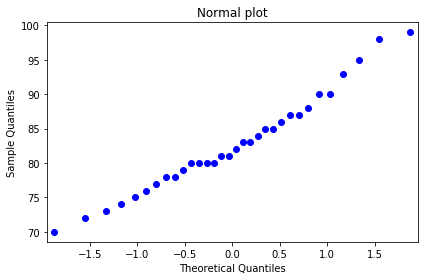

In [397]:
effects = np.array([90,74,81,83,77,81,88,73,98,72,87,85,99,79,87,80,93,78,85,80,78,80,82,70,95,76,83,86,90,75,84,80])
sm.graphics.qqplot(effects)
plt.title('Normal plot')
plt.tight_layout()

In [ ]:
82.78 - 9x1 - 1.3x2 - 2.68x3 + 3.93x4

In [417]:
predict = [82.78, 82.78 - 9*0.5 - 1.3*0.5 - 2.68*0.5 + 3.93*0.5,  82.78 - 9*1 - 1.3*1 - 2.68*1 + 3.93*1, 
           82.78 - 9*1 - 1.3*0 - 2.68*1 + 3.93*0,  82.78 - 9*0 - 1.3*1 - 2.68*0 + 3.93*1,
           82.78 - 9*0.6 - 1.3*0.3 - 2.68*0.4 + 3.93*0.7,  82.78 - 9*0.3 - 1.3*0.5 - 2.68*0.8 + 3.93*0.6,
          82.78 - 9*-0.6 - 1.3*-0.8 - 2.68*-0.3 + 3.93*-0.6, 82.78 - 9*-0.3 - 1.3*-0.5 - 2.68*-0.7 + 3.93*-0.2,
          82.78 - 9*0.3 - 1.3*-0.4 - 2.68*-0.7 + 3.93*0.4]

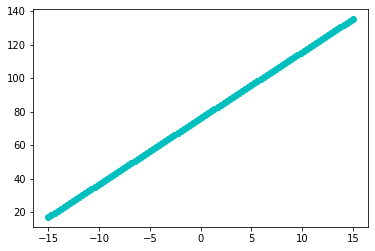

In [396]:
x = np.linspace(-15,15,100) # 100 linearly spaced numbers
y = 82.78 - 9*0.5 - 1.3*0.4 - 2.68*0.6 + 3.93*x # computing the values of sin(x)/x

pylab.plot(x,y) # sin(x)/x
pylab.plot(x,y,'co') # same function with cyan dots
 # 2*sin(x)/x and 3*sin(x)/x
pylab.show() # show the plot

ValueError: x and y must be the same size

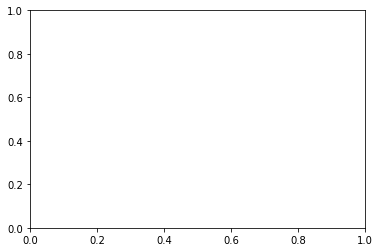

In [400]:


plt.scatter([90,74,81,83,77,81,88,73,98,72,87,85,99,79,87,80,93,78,85,80,78,80,82,70,95,76,83,86,90,75,84,80], predict, marker='*', color=['red','blue'])
plt.show()

In [405]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)
scipy.stats.probplot(measurements, dist="norm", plot=matplotlib.pyplot)


NameError: name 'matplotlib' is not defined

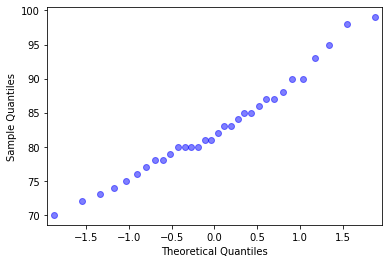

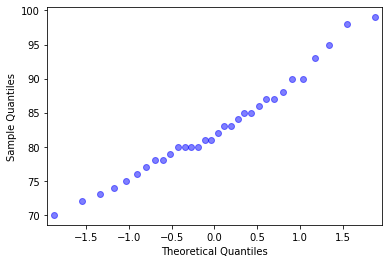

In [408]:
sm.graphics.qqplot(np.array([90,74,81,83,77,81,88,73,98,72,87,85,99,79,87,80,93,78,85,80,78,80,82,70,95,76,83,86,90,75,84,80]), alpha=0.5)

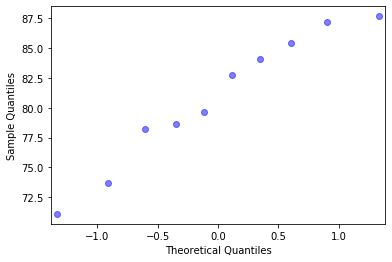

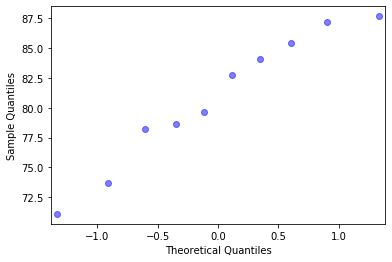

In [418]:
sm.graphics.qqplot(np.array(predict), alpha=0.5)